In [65]:
import pandas as pd
import itertools
from collections import Counter

In [66]:
#font setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20

In [75]:
def anchor_statics(file,hubsize,prefix,path):
    anchor_reads_detial_df = pd.read_table(f'{path}/{file}')
    anchor_detial_site_nunique = anchor_reads_detial_df.groupby('read_name')['anchor_name'].nunique()
    anchor_detial_site_nunique.value_counts().to_csv(f'{path}/{prefix}_anchor_valuecount.csv',sep='\t')
    anchor_and2_list = anchor_detial_site_nunique[anchor_detial_site_nunique>=2].index.to_list()
    anchor_and2_detail = anchor_reads_detial_df.query('read_name in @anchor_and2_list')
    anchor_and2_detail_dropdu = anchor_and2_detail.drop_duplicates(['read_name','anchor_name'])
    anchor_detial_combinations = anchor_and2_detail_dropdu.groupby('read_name').apply(lambda x : list(itertools.combinations(x['anchor_name'],hubsize)))
    anchor_comb_list = list(itertools.chain(*anchor_detial_combinations))
    anchor_comb_df = pd.DataFrame.from_dict(dict(Counter(anchor_comb_list)),orient='index')
    fig, ax = plt.subplots(figsize=(10,6))
    anchor_comb_df.sort_index().plot(kind='bar',ax=ax)
    ax.legend_.remove()
    plt.savefig(f'{path}/{prefix}_{hubsize}.png',format = 'png',dpi=300,bbox_inches = 'tight')
    return anchor_reads_detial_df,anchor_comb_df

In [68]:
path = '/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.2/Example_know'

In [69]:
peri_anchor_detail_file = 'DpnII_run04_peri_1M_anchor_reads_detail.csv'
kee_anchor_detail_file = 'DpnII_run04_kee_1M_anchor_reads_detail.csv'
telo_anchor_detail_file = 'DpnII_run04_telo_1M_anchor_reads_detail.csv'
subperi_anchor_detail_file = 'DpnII_run04_subperi_1M_anchor_reads_detail.csv'

In [70]:
file_dict = {'peri':peri_anchor_detail_file,
             'kee':kee_anchor_detail_file,
             'telo':telo_anchor_detail_file,
             'subperi':subperi_anchor_detail_file}

/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy

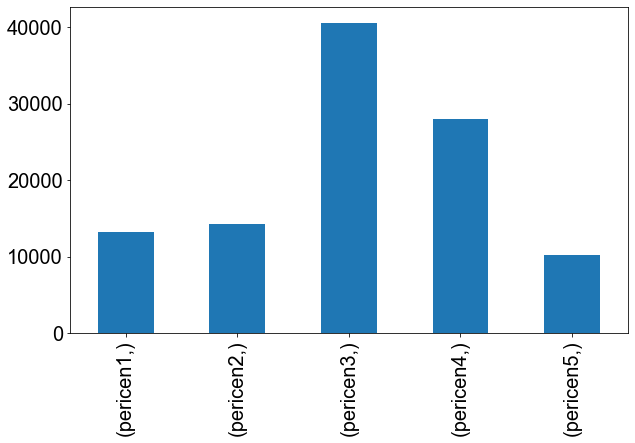

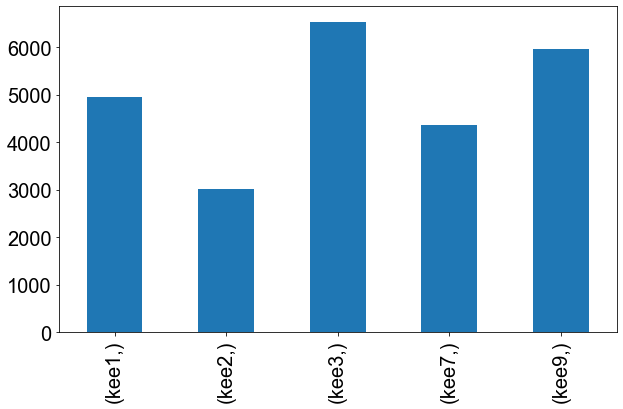

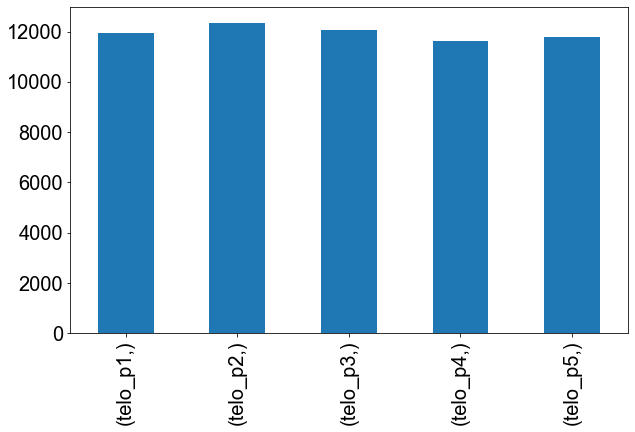

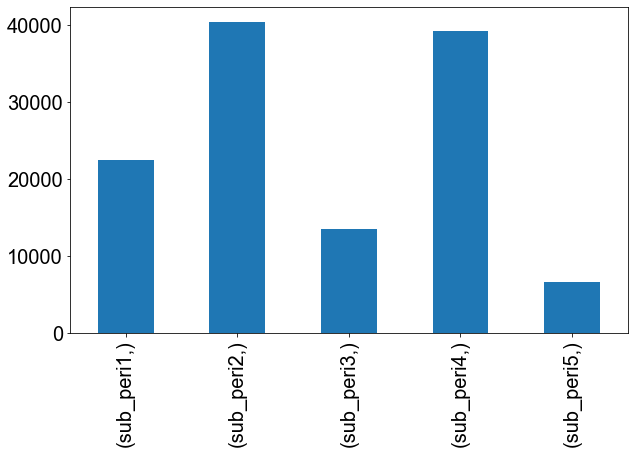

In [71]:
for prefix,file in file_dict.items():
    for hubsize in [1]:
        anchor_statics(file,hubsize,prefix,path)

/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


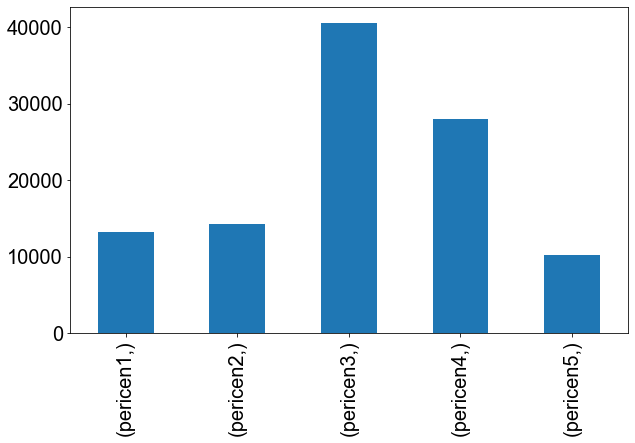

In [20]:
peri_1 = anchor_statics('DpnII_run04_peri_1M_anchor_reads_detail.csv',1,'peri',path)

/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


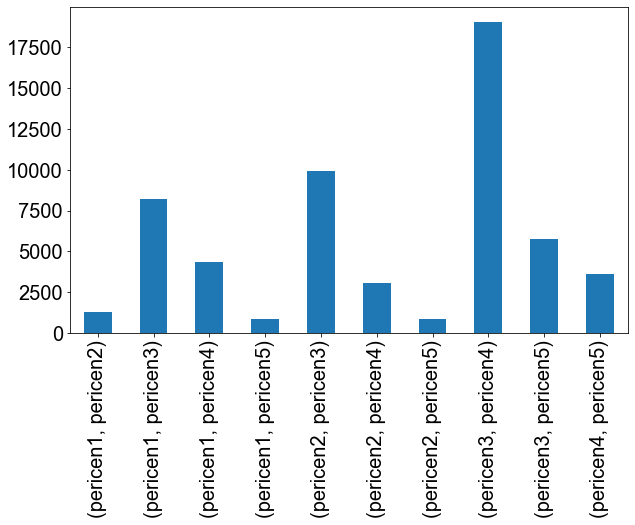

In [21]:
peri_2 = anchor_statics('DpnII_run04_peri_1M_anchor_reads_detail.csv',2,'peri',path)

/public/home/lizw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


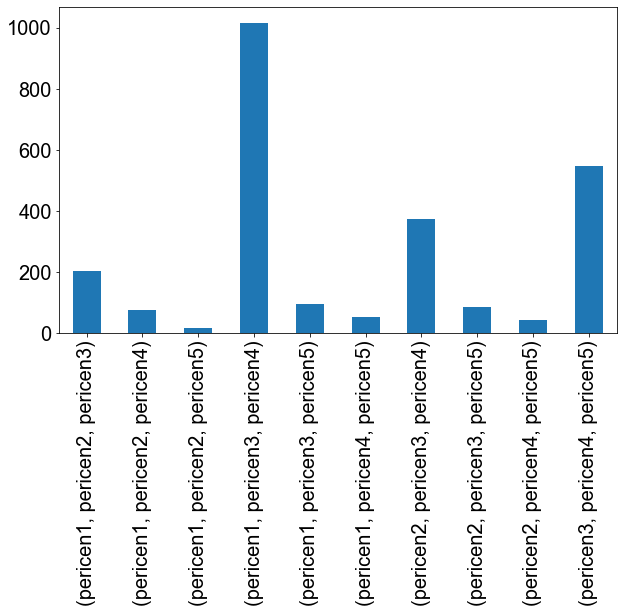

In [76]:
peri_3 = anchor_statics('DpnII_run04_peri_1M_anchor_reads_detail.csv',3,'peri',path)

In [78]:
peri_3[0]

,Unnamed: 0,chrom,read_name,fragment_mid,anchor_name
0,37.0,1,210bb0bb-632c-469b-b414-d48b810186f0,13867968,pericen1
1,372.0,1,189e92cd-9db0-43ae-84ff-f21bb15e4b47,14196346,pericen1
2,431.0,1,3942f48e-a11d-4d2e-a07b-9c8bd9bf61a6,14196346,pericen1
3,504.0,1,440055cd-1c68-456e-933a-660f9f5e13c4,13598837,pericen1
4,505.0,1,440055cd-1c68-456e-933a-660f9f5e13c4,13597772,pericen1
...,...,...,...,...,...
1082031,18226507.0,5,a9e7a5c9-f2f6-4bb0-9771-ea4eeb8dac2e,12242994,pericen5
1082032,18226570.0,5,69f80fee-eb87-4f59-b7af-e1cfc9507dae,12465260,pericen5
1082033,18226571.0,5,69f80fee-eb87-4f59-b7af-e1cfc9507dae,12649762,pericen5
1082034,18226572.0,5,69f80fee-eb87-4f59-b7af-e1cfc9507dae,12472714,pericen5


In [80]:
anchor_detial_site_nunique = peri_3[0].groupby('read_name')['anchor_name'].nunique()
anchor_detial_site_nunique.value_counts().to_csv(f'{prefix}_anchor_valuecount.csv',sep='\t')
anchor_and2_list = anchor_detial_site_nunique[anchor_detial_site_nunique>=2].index.to_list()
anchor_and2_detail = anchor_reads_detial_df.query('read_name in @anchor_and2_list')
anchor_and2_detail_dropdu = anchor_and2_detail.drop_duplicates(['read_name','anchor_name'])

NameError: name 'anchor_reads_detial_df' is not defined

In [83]:
anchor_detial_site_nunique

read_name
000047e3-c706-4192-b108-ac2971c8beb3    1
00005261-63b6-4c0d-9ba8-873842a33902    1
000054ba-a13e-4fa6-a0da-533105c9cd1c    1
000091f9-0876-49ee-be3f-c10826c2c86f    1
00012f6a-1df5-4fa7-89b7-85fe1a5ae63b    1
                                       ..
ffffab09-d321-4048-bef4-bb29b7e34227    2
ffffabb7-227e-4842-942f-43fc14f381fa    1
ffffd272-b0d8-4500-b693-ab8b6897373a    1
ffffe8ac-480a-496d-bf93-456b7e53889b    1
read_name                               1
Name: anchor_name, Length: 661450, dtype: int64